# Практическоe заданиe 2

### 1. Написание функций для посчета следующих характеристик:

In [3]:
import numpy as np
from collections import Counter
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import operator

#### а) Математическое ожидание

In [4]:
def mean(x):
    statistic_range = list(Counter(x).items())
    n = len(x)
    res = 0.
    for item in statistic_range:
        res += item[0] * (item[1] / n)
    return res

#### б) Медиана

In [5]:
def median(x):
    return quantile(x, 0.5)

#### в) Усеченное среднее

In [6]:
def trim_mean(x, part):
    assert (0 < part < 1)
    variation_x = sorted(list(x))
    trimmed_x = variation_x[int(part * len(x)):int(len(x) - int(part * len(x)))]
    return mean(trimmed_x)

#### г) Дисперсия

In [7]:
def var(x):
    return mean(x * x) - mean(x) ** 2

#### д) Квантиль

In [8]:
def quantile(x, level):
    assert (0 < level < 1)
    statistic_range = list(Counter(x).items())
    statistic_range.sort(key=lambda a: a[0])
    n = len(x)
    int_func = []
    prev = 0
    for item in statistic_range:
        int_func.append(prev + item[1] / n)
        prev += item[1] / n
    int_func.append(1)
    ind = 0
    if level in int_func:
        ind = int_func.index(level)
    elif level < int_func[0]:
        return statistic_range[0][0]
    else:
        for it in range(1, len(int_func) - 1):
            if int_func[it - 1] < level < int_func[it + 1]:
                ind = it
    return statistic_range[ind][0]

#### е) Центральный и начальный момент заданного порядка

In [9]:
def central_moment(x, order):
    return mean((x - mean(x)) ** order)

def start_moment(x, order):
    return mean(x ** order)

#### / Проверка результатов /

In [12]:
PATH = 'C:/study/practic_analytics/'
data = pd.read_excel(PATH + "02_Автоаварии.xls")

data.dropna(axis=0, subset=["Visibility(mi)"], inplace=True)

print("\nМатематическое ожидание")
print("numpy ", np.mean(data["Visibility(mi)"]))
print("my func", mean(data["Visibility(mi)"]))
print("\nДисперсия: ")
print("numpy ", np.var(data["Visibility(mi)"]))
print("my func", var(data["Visibility(mi)"]))
print("\nКвантиль порядка 0.1:")
print("numpy ", np.quantile(data["Visibility(mi)"], 0.1))
print("my func", quantile(data["Visibility(mi)"], 0.1))
print("\nМедиана:")
print("numpy ", np.median(data["Visibility(mi)"]))
print("my func", median(data["Visibility(mi)"]))
print("\nУсеченное среднее:")
print("scipy ", stats.trim_mean(data["Visibility(mi)"], 0.1))
print("my func", trim_mean(data["Visibility(mi)"], 0.1))
print("\nЦентральный момент:")
print("scipy ", stats.moment(data["Visibility(mi)"], 3))
print("my func", central_moment(data["Visibility(mi)"], 3))
print("\nНачальный момент:")
print("scipy  -")
print("my func", start_moment(data["Visibility(mi)"], 1))


Математическое ожидание
numpy  9.46561113352158
my func 9.465611133521582

Дисперсия: 
numpy  3.5586499996501475
my func 3.558649999650129

Квантиль порядка 0.1:
numpy  8.0
my func 8.0

Медиана:
numpy  10.0
my func 10.0

Усеченное среднее:
scipy  9.94077620967742
my func 9.940776209677418

Центральный момент:
scipy  -5.138314621395408
my func -5.138314621395432

Начальный момент:
scipy  -
my func 9.465611133521582


### 2. График, отражающий зависимость среднего значения видимости дороги от степени серьезности авариии

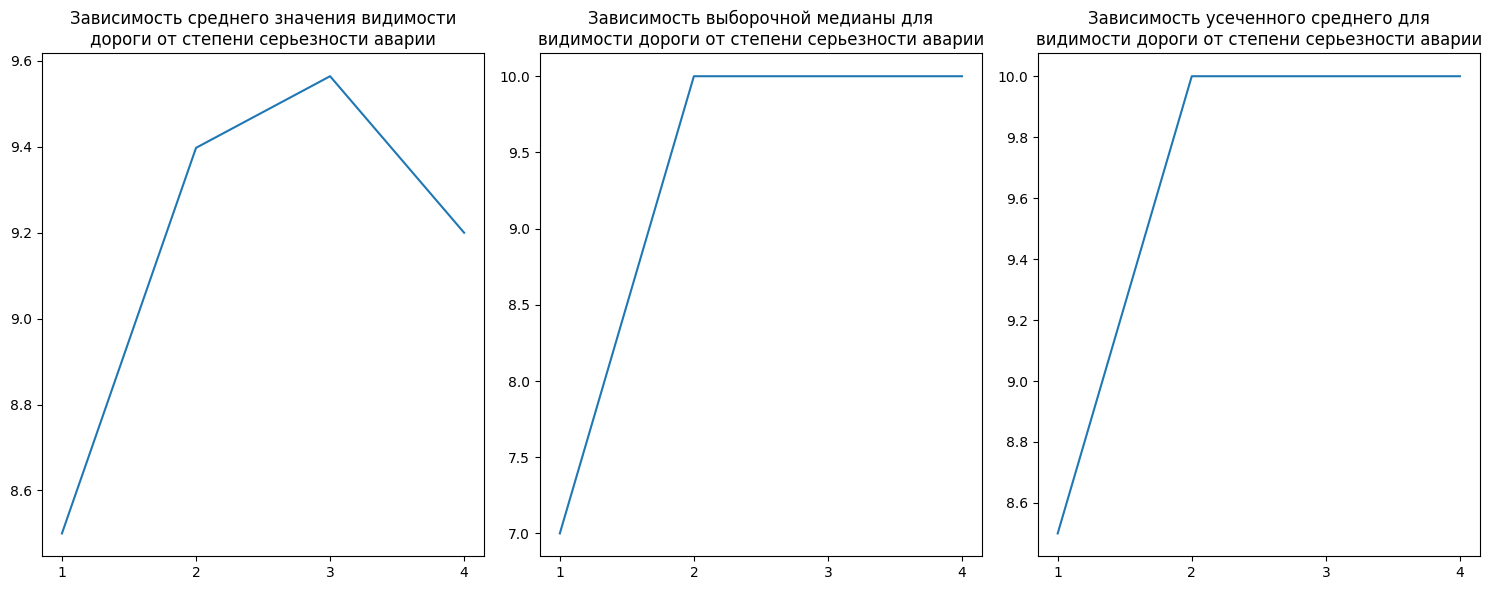

In [13]:
fig, axes = plt.subplots(ncols=3,figsize=(15,6))
mean_visibility = []
severity = []
median_visibility = []
trimmed_mean_visibility = []
for i in range(4):
    severity.append(i + 1)
    mean_visibility.append(mean(data.loc[data["Severity"] == i + 1]["Visibility(mi)"]))
    median_visibility.append(median(data.loc[data["Severity"] == i + 1]["Visibility(mi)"]))
    trimmed_mean_visibility.append(trim_mean(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], 0.2))
axes[0].plot(severity, mean_visibility)
axes[0].set_xticks(severity)
axes[0].set_title("Зависимость среднего значения видимости\nдороги от степени серьезности аварии")
axes[1].plot(severity, median_visibility)
axes[1].set_xticks(severity)
axes[1].set_title("Зависимость выборочной медианы для\nвидимости дороги от степени серьезности аварии")
axes[2].plot(severity, trimmed_mean_visibility)
axes[2].set_xticks(severity)
axes[2].set_title("Зависимость усеченного среднего для\nвидимости дороги от степени серьезности аварии")
fig.tight_layout()
plt.show()

### 3. Оценки функций распределения и коробчатые диаграммы

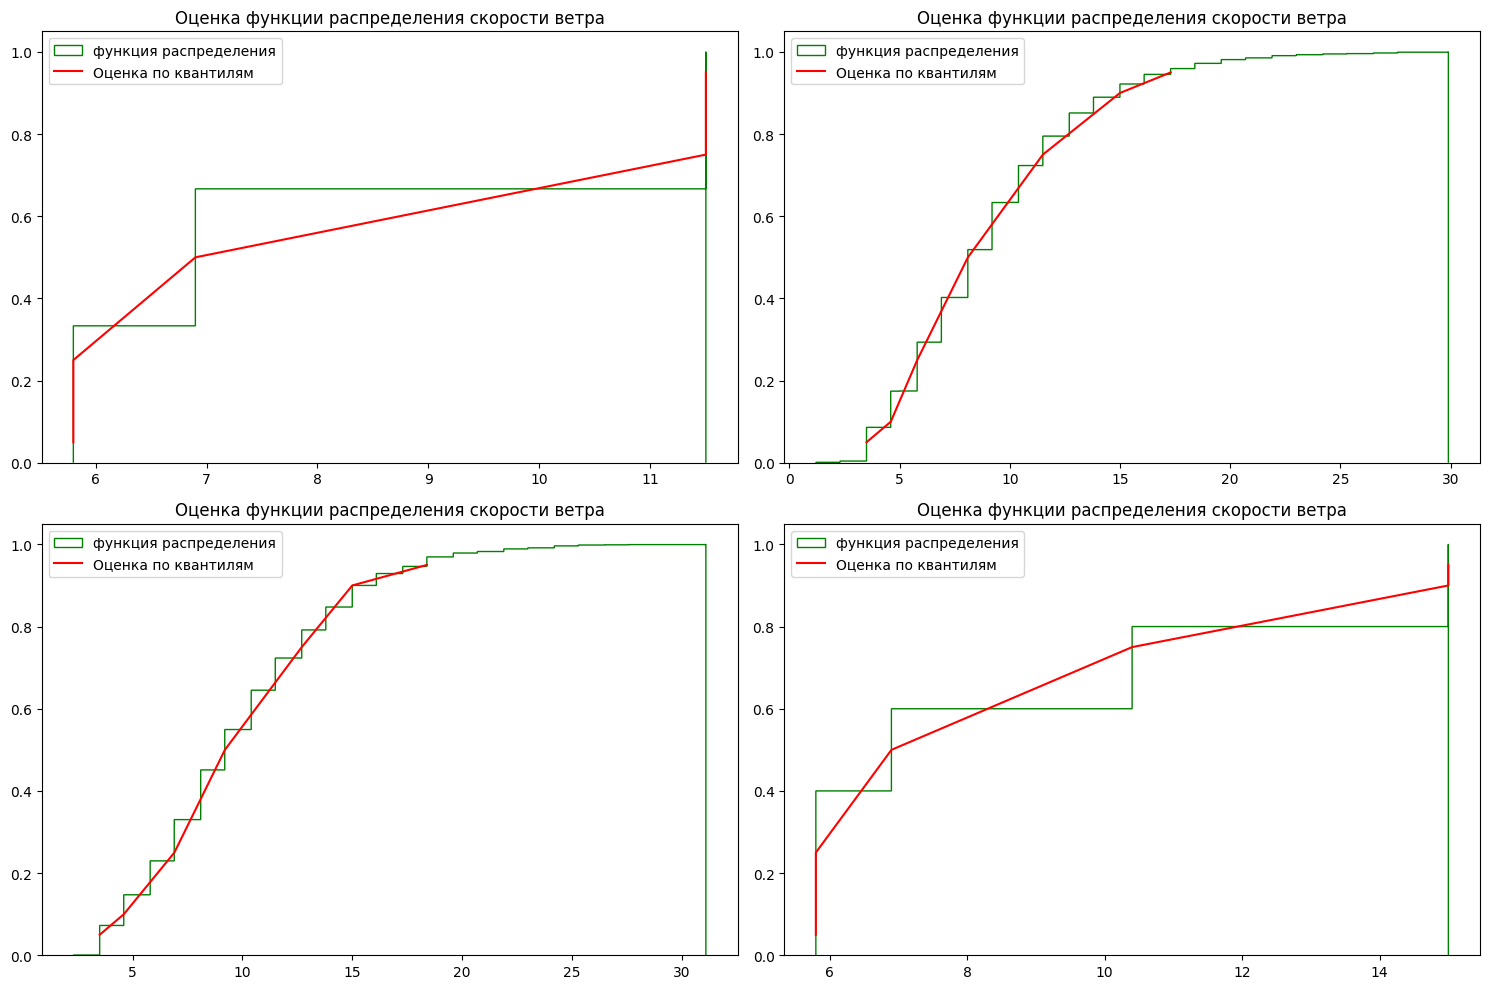

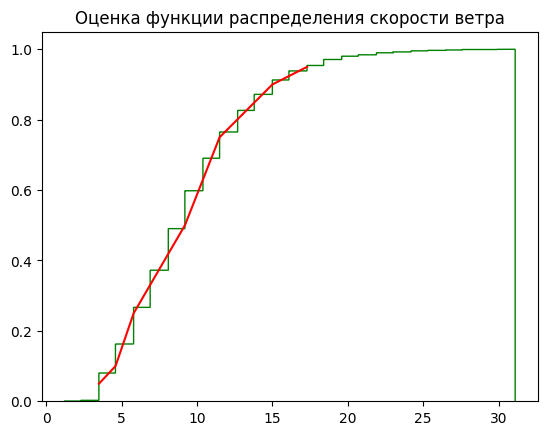

In [16]:
data.dropna(axis=0, subset=["Wind_Speed(mph)"], inplace=True)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

for i in range(4):
    axes[int(i / 2)][i % 2].hist(data.loc[data["Severity"] == i + 1]["Wind_Speed(mph)"], bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True, label="функция распределения")
    q_values = []
    for q in quantiles:
        q_values.append(quantile(data.loc[data["Severity"] == i + 1]["Wind_Speed(mph)"], q))
    axes[int(i / 2)][i % 2].plot(q_values, quantiles, color='red', label="Оценка по квантилям")
    axes[int(i / 2)][i % 2].set_title("Оценка функции распределения скорости ветра")
    axes[int(i / 2)][i % 2].legend()
fig.tight_layout()
plt.show()

plt.hist(data["Wind_Speed(mph)"],
bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True)
q_values = []
for q in quantiles:
 q_values.append(quantile(data["Wind_Speed(mph)"], q))
plt.plot(q_values, quantiles, color='red')
plt.title("Оценка функции распределения скорости ветра")
plt.show()


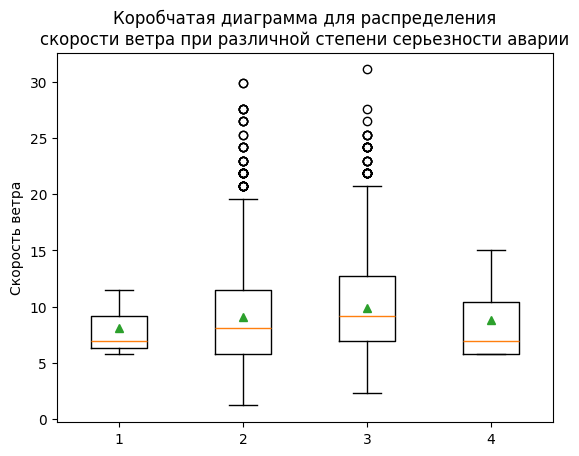

Выборочная мода для Wind_Speed(mph) :  8.1
Выборочная мода для Wind_Speed(mph) [Severity] == 1:  5.8
Выборочная мода для Wind_Speed(mph) [Severity] == 2:  5.8
Выборочная мода для Wind_Speed(mph) [Severity] == 3:  8.1
Выборочная мода для Wind_Speed(mph) [Severity] == 4:  5.8


In [18]:
plt.boxplot([data.loc[data["Severity"] == 1]["Wind_Speed(mph)"],
data.loc[data["Severity"] == 2]["Wind_Speed(mph)"],
data.loc[data["Severity"] == 3]["Wind_Speed(mph)"],
data.loc[data["Severity"] == 4]["Wind_Speed(mph)"]], showmeans=True)
plt.xticks(np.arange(1, 5, step=1), labels=["1", "2", "3", "4"])
plt.ylabel("Скорость ветра")
plt.title("Коробчатая диаграмма для распределения\nскорости ветра при различной степени серьезности аварии")
plt.show()


print("Выборочная мода для Wind_Speed(mph) : ",
max(Counter(data["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 1: ",
max(Counter(data.loc[data["Severity"] == 1]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 2: ",
max(Counter(data.loc[data["Severity"] == 2]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 3: ",
max(Counter(data.loc[data["Severity"] == 3]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 4: ",
max(Counter(data.loc[data["Severity"] == 4]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])